# Usman Khalid

## Machine Learning
#### Self-taught Project Work

This script uses k-means to cluster Iris flowers based on their sizes provided in the dataset

### importing required libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

### loading data from the CSV file

In [26]:
iris = pd.read_csv(r'D:/Usman/Data Science/The Sparks Foundation/'
                   r'Task 2/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# isolating the numeric data from the labels (strings)
dimensions = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                   'PetalWidthCm']]
# scaling features
X = scale(dimensions)

### using elbow method to determine optimum number of clusters

In [28]:
# training K-Means for cluster = 1 to 10
cost = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, n_init=10, random_state=5,
                        max_iter=500)
    y_km = clustering.fit_predict(X)
    cost.append(clustering.inertia_)

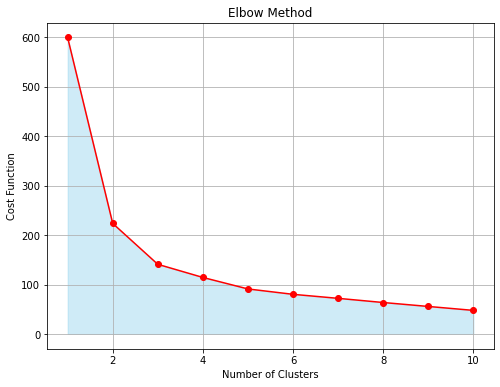

In [36]:
# plotting cluster number against the function cost
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), cost, marker='o', c='red')
plt.fill_between(range(1, 11), cost, color='skyblue', alpha=0.4)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost Function')
plt.grid()
plt.show()

#### As evident from the figure above, after k=3, the cost reduction is small hence we will use k = 3 as the optimum cluster number

In [30]:
# calculating K-Means for the optimal cluster number i.e 3
clustering = KMeans(n_clusters=3, n_init=10, random_state=5,
                    max_iter=500)
y_km = clustering.fit_predict(X)

### plotting the results with K centroids
#### The features are scaled hence both the axis will show values in range -3<x<+3

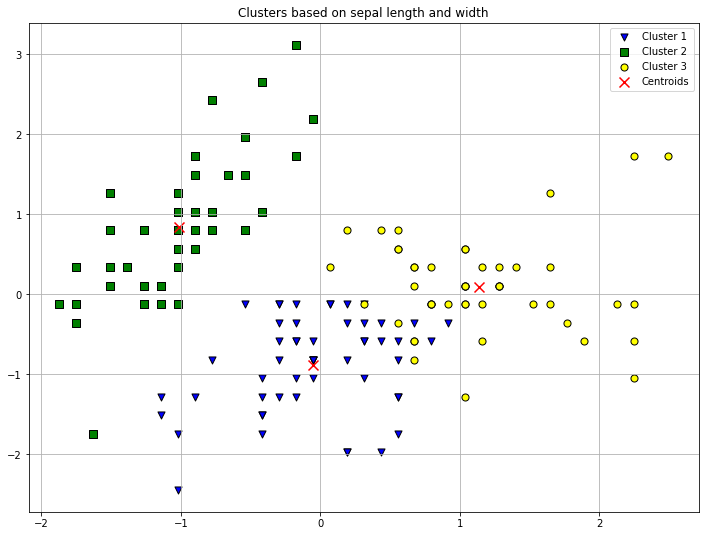

In [33]:
# plotting clusters according to sepal dimensions
plt.figure(figsize=(12,9))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='blue',
            marker='v', edgecolors='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='green',
            marker='s', edgecolors='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='yellow',
            marker='o', edgecolors='black', label='Cluster 3')
plt.title("Clusters based on sepal length and width")
# plotting cluster centroids
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1],
            marker='x', s=100, c='red', label='Centroids')
plt.legend()
plt.grid()
plt.show()

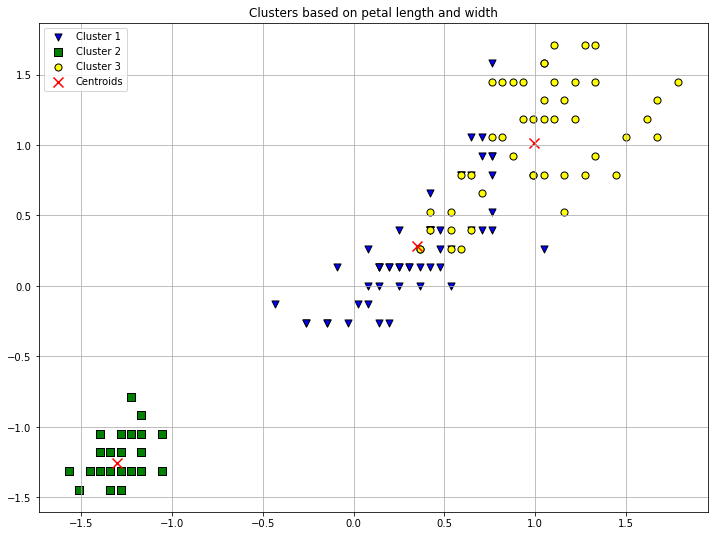

In [34]:
# plotting clusters according to petal dimensions
plt.figure(figsize=(12,9))
plt.scatter(X[y_km == 0, 2], X[y_km == 0, 3], s=50, c='blue',
            marker='v', edgecolors='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 2], X[y_km == 1, 3], s=50, c='green',
            marker='s', edgecolors='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 2], X[y_km == 2, 3], s=50, c='yellow',
            marker='o', edgecolors='black', label='Cluster 3')
plt.title("Clusters based on petal length and width")
# plotting cluster centroids
plt.scatter(clustering.cluster_centers_[:,2], clustering.cluster_centers_[:,3],
            marker='x', s=100, c='red', label='Centroids')
plt.legend()
plt.grid()
plt.show()